In [1]:
%pip install numpy scipy matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Mean: 0.05659215340623095
Median: 0.09133885415985488
Standard Deviation: 0.9925445019972016


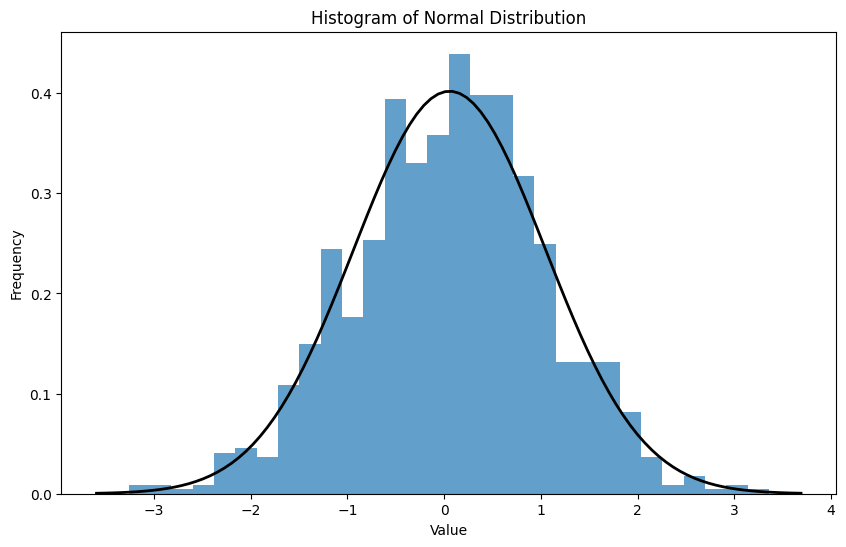


95% Confidence Interval: (-0.005030702785354953, 0.11821500959781686)

t-statistic: 1.8021418653268289
p-value: 0.07182443582360469


In [3]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# データセットの生成
data = np.random.normal(loc=0, scale=1, size=1000)

# 基本統計量の計算
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)

# ヒストグラムのプロット
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.7)
plt.title("Histogram of Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")

# 正規分布の確率密度関数をプロット
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

# 信頼区間の計算
confidence_interval = stats.t.interval(confidence=0.95, df=len(data)-1,
                                       loc=np.mean(data),
                                       scale=stats.sem(data))
print("\n95% Confidence Interval:", confidence_interval)

# 仮説検定（例：1サンプルのt検定）
t_statistic, p_value = stats.ttest_1samp(data, popmean=0)
print("\nt-statistic:", t_statistic)
print("p-value:", p_value)

Iteration 0, Loss: 14.261552960038477
Iteration 100, Loss: 4.492878619807894
Iteration 200, Loss: 4.176614479396994
Iteration 300, Loss: 4.055430714388354
Iteration 400, Loss: 4.008996411458563
Iteration 500, Loss: 3.9912040571079475
Iteration 600, Loss: 3.984386513753921
Iteration 700, Loss: 3.9817742176817923
Iteration 800, Loss: 3.98077325730441
Iteration 900, Loss: 3.980389716676003


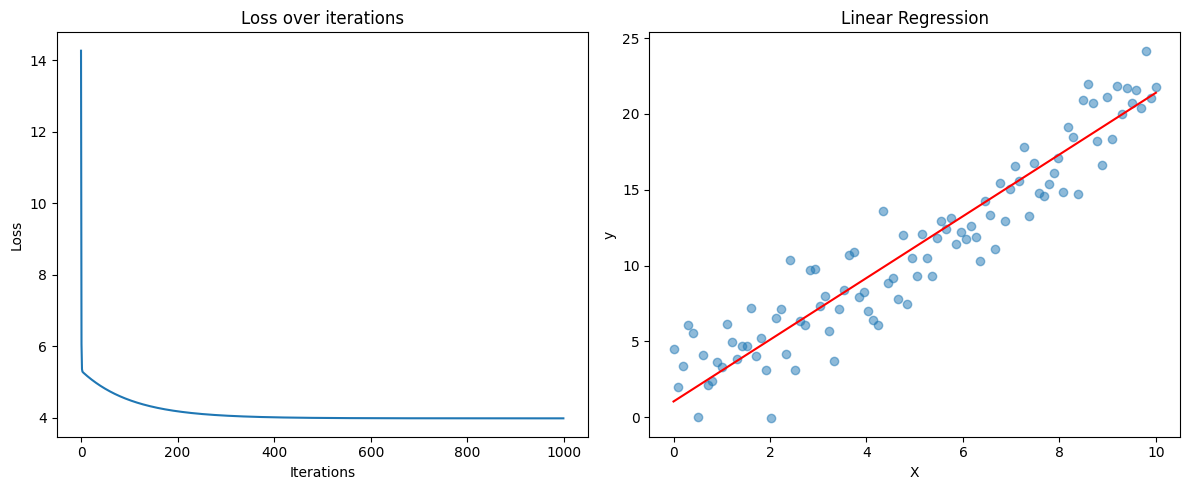


Test Loss: 4.676323034014326


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# データの生成
np.random.seed(0)  # 再現性のために乱数シードを固定
X = np.linspace(0, 10, 100).reshape(-1, 1)  # 0から10までの100個の等間隔な点を生成
y = 2 * X + 1 + np.random.randn(100, 1) * 2  # y = 2x + 1 の関係に乱数でノイズを加える

# データの分割
# test_size=0.2: データの20%をテストデータとして使用
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルのパラメータ
w = np.random.randn(1)  # 傾き (重み) をランダムに初期化
b = np.random.randn(1)  # 切片 (バイアス) をランダムに初期化

# ハイパーパラメータ
learning_rate = 0.01  # 学習率: 更新の大きさを制御。小さすぎると学習が遅く、大きすぎると発散する可能性がある
n_iterations = 1000  # 学習の繰り返し回数: モデルの収束に十分な回数を設定

# 損失関数（平均二乗誤差）
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 予測関数
def predict(X):
    return X * w + b

# 勾配降下法
losses = []
for i in range(n_iterations):
    # 予測
    y_pred = predict(X_train)
    
    # 損失の計算
    loss = mse_loss(y_train, y_pred)
    losses.append(loss)
    
    # 勾配の計算
    # MSEの微分: ∂MSE/∂ŷ_i = (-2/N) * (y_i - ŷ_i)
    # -2: チェーンルールによる微分の結果。(y_i - ŷ_i)をŷ_iで微分すると-1が得られ、
    # これと2/Nを掛け合わせた-2/Nの-2部分。Nで割る操作は平均を取る際に行われるため、
    # ここでは-2だけを掛けている。
    dw = -2 * np.mean(X_train * (y_train - y_pred))  # wに関する勾配
    db = -2 * np.mean(y_train - y_pred)  # bに関する勾配
    
    # パラメータの更新
    w -= learning_rate * dw  # 勾配降下法による重みの更新
    b -= learning_rate * db  # 勾配降下法によるバイアスの更新
    
    if i % 100 == 0:  # 100イテレーションごとに損失を表示
        print(f"Iteration {i}, Loss: {loss}")

# 結果のプロット
plt.figure(figsize=(12, 5))  # 図のサイズを設定: 幅12インチ、高さ5インチ

# 損失の推移
plt.subplot(121)  # 1行2列のプロットの1番目: 12は1行2列、1は1番目の位置を意味する
plt.plot(losses)
plt.title('Loss over iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# データと回帰線
plt.subplot(122)  # 1行2列のプロットの2番目
plt.scatter(X, y, alpha=0.5)  # alpha=0.5: 点の透明度を設定（0: 完全透明, 1: 不透明）
plt.plot(X, predict(X), color='r')  # 'r': 赤色を指定
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')

plt.tight_layout()
plt.show()

# テストデータでの評価
y_pred_test = predict(X_test)
test_loss = mse_loss(y_test, y_pred_test)
print(f"\nTest Loss: {test_loss}")

学習後の重み: [0.7263859  0.10543214]
学習後のバイアス: -0.7496345403276707


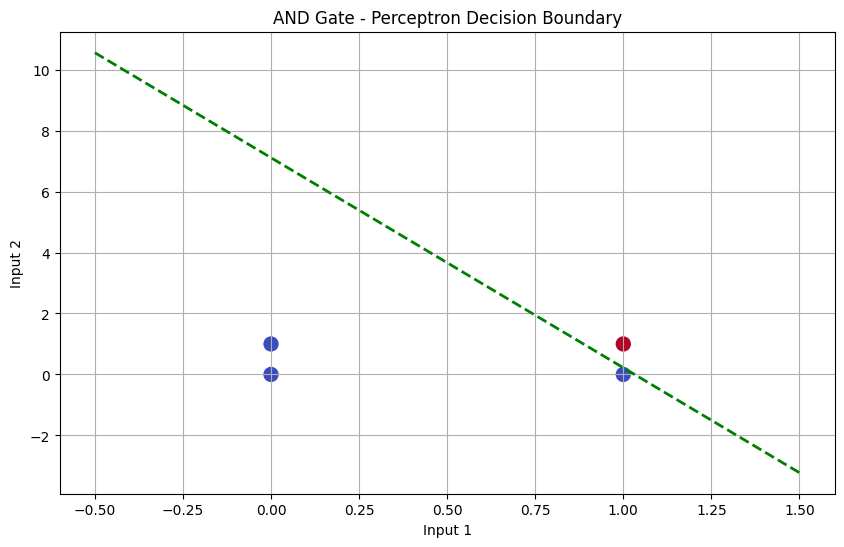

Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 1


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# パーセプトロンとは：
# 1. 定義：最も基本的な人工ニューロンモデルの一つ。複数の入力を受け取り、
#    それらに重みを掛けて合計し、閾値と比較して出力を決定する。
# 2. 構造：入力層、重み、バイアス（閾値）、活性化関数から構成される。
# 3. 機能：線形分離可能な問題を解決できる（例：AND、OR、NANDゲート）。
# 4. 限界：XORのような線形分離不可能な問題は解決できない。
# 5. 重要性：ニューラルネットワークの基本構成要素であり、機械学習の基礎概念を理解する上で重要。

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # input_size: 入力の次元数
        # learning_rate: 学習率。0.1は経験的に良い初期値とされる
        self.weights = np.random.randn(input_size)  # 重みをランダムに初期化
        self.bias = np.random.randn()  # バイアスをランダムに初期化
        self.learning_rate = learning_rate

    def activate(self, x):
        # ステップ関数を活性化関数として使用
        # 0を閾値とし、xが正なら1、それ以外は0を返す
        return 1 if x > 0 else 0

    def predict(self, inputs):
        # 入力と重みの積和にバイアスを加え、活性化関数に通す
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activate(summation)

    def train(self, training_inputs, labels, epochs):
        # epochs: 学習の繰り返し回数。100は経験的に設定された値
        for _ in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                # デルタルールによる重みとバイアスの更新
                # (label - prediction)は予測誤差
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)

# AND論理ゲートのデータ
# ANDゲートは、パーセプトロンで実現可能な最も単純な例の一つであり、
# 線形分離可能な問題の代表例として使用される
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 入力の全パターン
y = np.array([0, 0, 0, 1])  # ANDゲートの正解出力

# パーセプトロンの初期化と学習
perceptron = Perceptron(input_size=2)  # 入力は2次元（2つの入力）
perceptron.train(X, y, epochs=100)  # 100エポックで学習

# 結果の表示
print("学習後の重み:", perceptron.weights)
print("学習後のバイアス:", perceptron.bias)

# 決定境界のプロット
plt.figure(figsize=(10, 6))  # 図のサイズを設定：幅10インチ、高さ6インチ
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=100)
# c=y: 正解ラベルに基づいて点の色を設定
# cmap=plt.cm.coolwarm: 青から赤のカラーマップを使用
# s=100: 点のサイズを100に設定

# 決定境界線の計算と描画
# 決定境界とは、異なるクラスのデータ点を分離する超平面（2次元の場合は直線）
# パーセプトロンの場合、w1*x1 + w2*x2 + b = 0 という式で表される
x_range = np.linspace(-0.5, 1.5, 100)  # -0.5から1.5まで100点で分割
# 決定境界の方程式: w1*x + w2*y + b = 0 より、y = -(w1*x + b) / w2
y_range = -(perceptron.weights[0] * x_range + perceptron.bias) / perceptron.weights[1]
plt.plot(x_range, y_range, 'g--', linewidth=2)  # 緑の破線で決定境界を描画

# 決定境界の意義:
# 1. クラス分類の可視化: データ点がどのように分類されているかを視覚的に示す
# 2. モデルの性能評価: 決定境界の位置や形状から、モデルの分類性能を評価できる
# 3. 過学習の検出: 決定境界が複雑すぎる場合、過学習の兆候を示す可能性がある
# 4. 特徴空間の理解: 入力特徴がどのように分類に寄与しているかを理解するのに役立つ

plt.title('AND Gate - Perceptron Decision Boundary')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.grid(True)
plt.show()

# テスト
for inputs in X:
    print(f"Input: {inputs}, Prediction: {perceptron.predict(inputs)}")

# パーセプトロンの重要性：
# 1. 機械学習の基礎：単純な構造ながら、基本的な学習アルゴリズムを示す
# 2. ニューラルネットワークの基本単位：より複雑なネットワークの構成要素となる
# 3. 分類問題の理解：線形分離可能な問題と不可能な問題の違いを理解するのに役立つ
# 4. 歴史的意義：機械学習の初期の重要な発展の一つであり、現代のディープラーニングにつながる

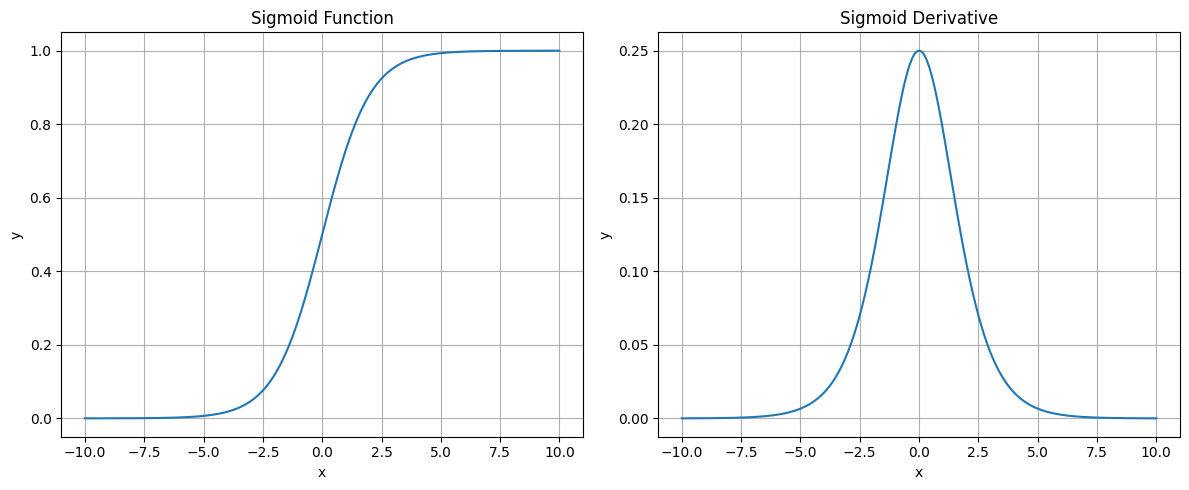

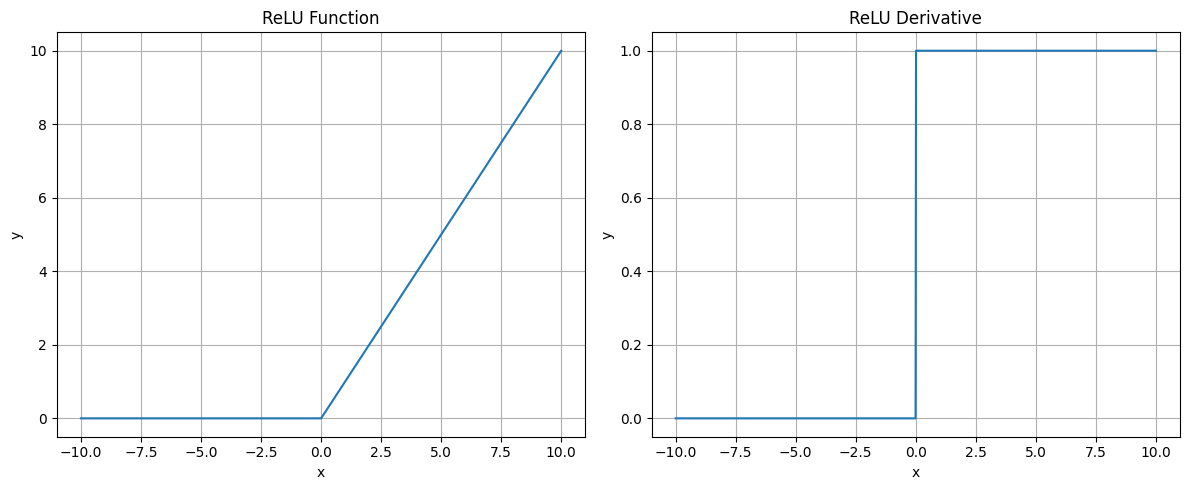

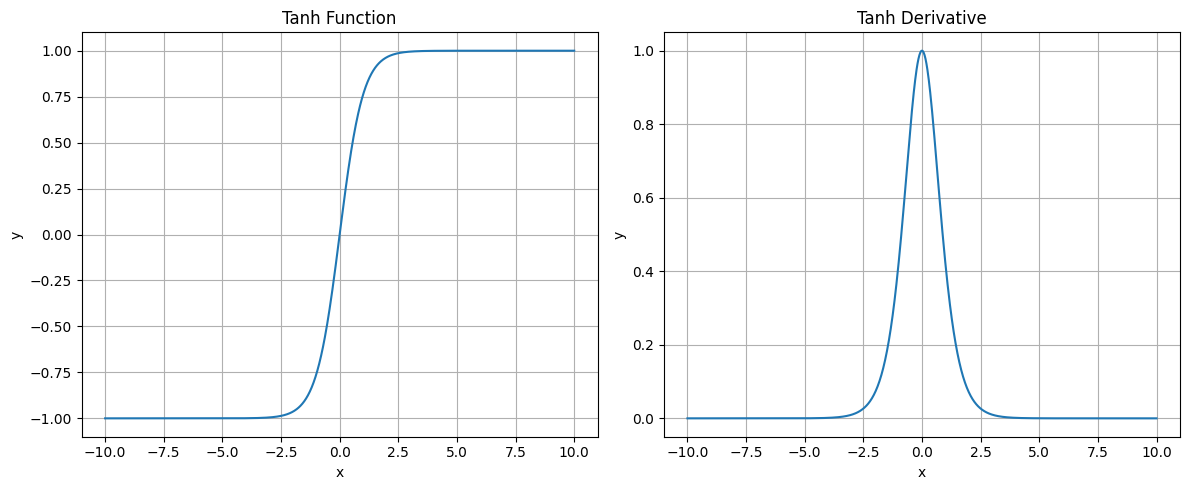

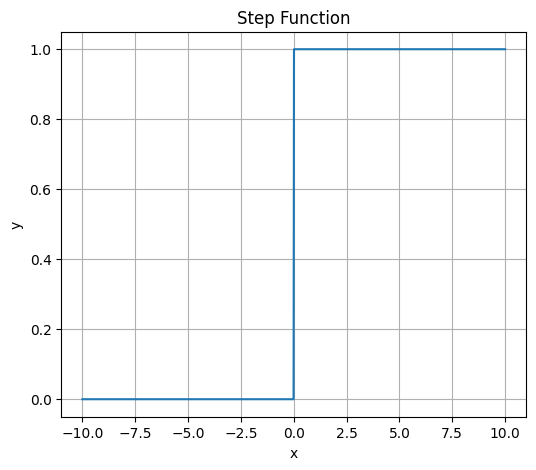

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 活性化関数の定義
def step_function(x):
    # ステップ関数：閾値（この場合は0）を境に0か1を返す
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    # シグモイド関数：S字カーブを描き、出力を0から1の間に収める
    return 1 / (1 + np.exp(-x))

def relu(x):
    # ReLU (Rectified Linear Unit)：正の値はそのまま、負の値は0を返す
    return np.maximum(0, x)

def tanh(x):
    # tanh関数：シグモイド関数と似ているが、出力範囲が-1から1
    return np.tanh(x)

# 導関数の定義
# 導関数を示す重要性：
# 1. バックプロパゲーション：ニューラルネットワークの学習において、誤差を逆伝播させる際に導関数が必要
# 2. 勾配計算：最適化アルゴリズムで使用される勾配の計算に導関数が不可欠
# 3. 学習の挙動理解：活性化関数の導関数の特性が、ネットワークの学習挙動に大きく影響する
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# グラフ描画用の関数
def plot_function_and_derivative(func, derivative, name):
    x = np.linspace(-10, 10, 1000)  # -10から10まで1000点でサンプリング
    y = func(x)
    y_der = derivative(x)

    plt.figure(figsize=(12, 5))  # 図のサイズを幅12インチ、高さ5インチに設定
    plt.subplot(1, 2, 1)  # 1行2列のプロットの1番目
    plt.plot(x, y)
    plt.title(f'{name} Function')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    plt.subplot(1, 2, 2)  # 1行2列のプロットの2番目
    plt.plot(x, y_der)
    plt.title(f'{name} Derivative')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 各活性化関数とその導関数をプロット
plot_function_and_derivative(sigmoid, sigmoid_derivative, 'Sigmoid')
plot_function_and_derivative(relu, relu_derivative, 'ReLU')
plot_function_and_derivative(tanh, tanh_derivative, 'Tanh')

# ステップ関数は導関数が定義できないため、関数のみをプロット
x = np.linspace(-10, 10, 1000)
y = step_function(x)
plt.figure(figsize=(6, 5))  # 図のサイズを幅6インチ、高さ5インチに設定
plt.plot(x, y)
plt.title('Step Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# 活性化関数の重要性：
# 1. 非線形性の導入：ネットワークに非線形の表現力を与え、複雑な関数の近似を可能にする
# 2. 勾配の伝播：バックプロパゲーションにおいて、勾配を適切に伝播させる役割を果たす
# 3. 出力の正規化：シグモイドやtanhは出力を一定範囲に収める効果がある
# 4. 特徴抽出：ReLUなどは、特定の特徴を強調する効果がある

# 各活性化関数の特徴：
# - シグモイド：出力が0~1に収まるため、確率を表現するのに適している。ただし、勾配消失問題が起こりやすい
# - ReLU：計算が簡単で、勾配消失問題を軽減できる。ただし、負の入力に対して常に0を出力する「死んだReLU」問題がある
# - tanh：シグモイドと似ているが、出力が-1~1に収まるため、中心化されたデータに対して有効
# - ステップ関数：最も単純だが、勾配が0になるため学習に使用できない。パーセプトロンで使用される

# 導関数を示すタイミングの重要性：
# 1. 学習メカニズムの理解：バックプロパゲーションアルゴリズムを理解する上で導関数の概念が不可欠
# 2. 最適化の基礎：勾配降下法などの最適化アルゴリズムが導関数を利用することを理解する
# 3. 活性化関数の選択：各活性化関数の導関数の特性が学習に与える影響を理解し、適切な選択ができるようになる

# 多層パーセプトロン（MLP）とXOR問題

## 導入
多層パーセプトロン（MLP）は、単純なパーセプトロンを拡張した、より複雑なニューラルネットワークモデルです。MLPは、入力層、1つ以上の隠れ層、そして出力層から構成されます。この構造により、MLPは非線形の問題を解決することができます。

## XOR問題
XOR（排他的論理和）問題は、単純なパーセプトロンでは解決できない非線形分離問題の代表例です。XOR関数は以下のような真理値表を持ちます：

| 入力1 | 入力2 | 出力 |
|-------|-------|------|
|   0   |   0   |  0   |
|   0   |   1   |  1   |
|   1   |   0   |  1   |
|   1   |   1   |  0   |

この問題を解決するために、我々は隠れ層を持つMLPを使用します。

# XORゲートをANDゲートとORゲートで実現する方法

## XORゲートの論理
XOR（排他的論理和）は、入力が異なる場合に1を出力し、同じ場合に0を出力する論理ゲートです。具体的な真理値表は以下の通りです：

| 入力1 | 入力2 | XOR出力 |
|-------|-------|---------|
|   0   |   0   |    0    |
|   0   |   1   |    1    |
|   1   |   0   |    1    |
|   1   |   1   |    0    |

## XORを実現する論理式
XORは以下のようにAND、OR、NOTを組み合わせて表現できます：

\[ \text{XOR}(A, B) = (A \text{ OR } B) \text{ AND NOT }(A \text{ AND } B) \]

### 論理式の解説
1. **(A OR B)**:
   - AまたはBのいずれかが1ならば1を出力します。

2. **(A AND B)**:
   - AとBの両方が1のときにのみ1を出力します。

3. **NOT(A AND B)**:
   - AとBの両方が1のときに0を出力し、それ以外は1を出力します。

4. **最終的なAND**:
   - ORの結果とANDの否定をANDします。これにより、XORの動作が実現されます。

### 多層パーセプトロンでの実現
多層パーセプトロン（MLP）は、隠れ層を使ってこの非線形な変換を学習します。具体的には、隠れ層のニューロンがANDやORのような動作を学習し、出力層がそれらを組み合わせてXORを実現します。

このように、MLPは複雑な非線形問題を解決するために、シンプルな論理ゲートを組み合わせたネットワークを構築することができます。

## 実装
以下のコードでは、2つの入力ニューロン、2つの隠れニューロン、1つの出力ニューロンを持つMLPを実装し、XOR問題を解決します。

Epoch 0, Loss: 0.24957290340615312
Epoch 1000, Loss: 0.2413725280476482
Epoch 2000, Loss: 0.1803075752230273
Epoch 3000, Loss: 0.06791025839540503
Epoch 4000, Loss: 0.023384114958340415
Epoch 5000, Loss: 0.011961838028385968
Epoch 6000, Loss: 0.007610106230477533
Epoch 7000, Loss: 0.0054441898921604205
Epoch 8000, Loss: 0.004180390255889237
Epoch 9000, Loss: 0.003363590912268942


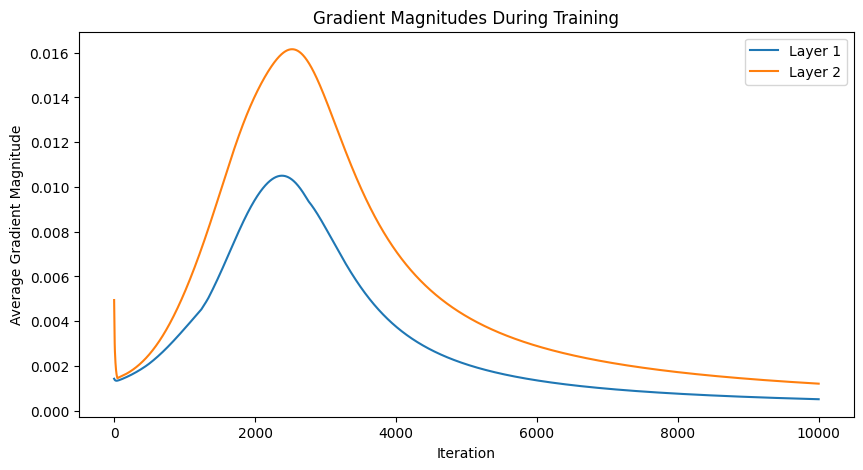

Input: [0 0], Predicted Output: [[0.]]
Input: [0 1], Predicted Output: [[1.]]
Input: [1 0], Predicted Output: [[1.]]
Input: [1 1], Predicted Output: [[0.]]


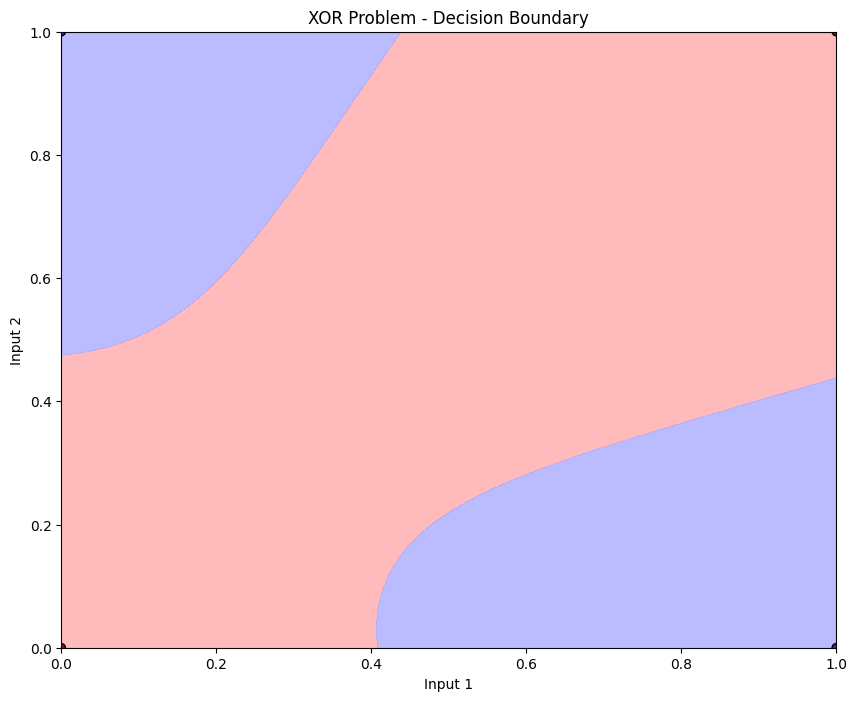

In [70]:
import numpy as np
import matplotlib.pyplot as plt

class MultiLayerPerceptron:

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # input_size: 入力層のニューロン数
        # hidden_size: 隠れ層のニューロン数
        # output_size: 出力層のニューロン数
        # learning_rate: 学習率（デフォルト値0.01は経験的に良い初期値とされる）

        # Xavierの初期化を使用
        self.weights1 = np.random.randn(input_size, hidden_size) / np.sqrt(input_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size) / np.sqrt(hidden_size)
        self.bias2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

        # NOTE: こちらの初期化方法ではうまく学習が行われなかった
        # 初期値が小さすぎて勾配消失問題が発生してたと思われる
        # self.weights1 = np.random.randn(input_size, hidden_size) * 0.01
        # self.bias1 = np.zeros((1, hidden_size))
        # self.weights2 = np.random.randn(hidden_size, output_size) * 0.01
        # self.bias2 = np.zeros((1, output_size))
        # self.learning_rate = learning_rate

        # 勾配の履歴を保存するリスト
        self.gradient_history = []

    def sigmoid(self, x):
        # シグモイド関数：出力を0から1の間に収める非線形活性化関数
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # シグモイド関数の導関数：学習時の勾配計算に使用
        return x * (1 - x)

    def forward(self, X):
        # 順伝播：入力から出力を計算
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.output = self.sigmoid(self.z2)
        return self.output

    def backward(self, X, y):
        # 逆伝播：出力の誤差を用いて重みを更新
        output_error = self.output - y
        output_delta = output_error * self.sigmoid_derivative(self.output)

        hidden_layer_error = output_delta.dot(self.weights2.T)
        hidden_layer_delta = hidden_layer_error * self.sigmoid_derivative(self.a1)

        # 勾配の計算
        w2_gradient = self.a1.T.dot(output_delta)
        w1_gradient = X.T.dot(hidden_layer_delta)
        
        # 勾配の大きさを記録
        self.gradient_history.append((np.mean(np.abs(w1_gradient)), np.mean(np.abs(w2_gradient))))

        # 重みとバイアスの更新
        self.weights2 -= w2_gradient * self.learning_rate
        self.bias2 -= np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
        self.weights1 -= w1_gradient * self.learning_rate
        self.bias1 -= np.sum(hidden_layer_delta, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        # 指定されたエポック数だけ学習を繰り返す
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y)
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - self.output))
                print(f"Epoch {epoch}, Loss: {loss}")

        # 勾配の履歴をプロット
        plt.figure(figsize=(10, 5))
        plt.plot([g[0] for g in self.gradient_history], label='Layer 1')
        plt.plot([g[1] for g in self.gradient_history], label='Layer 2')
        plt.xlabel('Iteration')
        plt.ylabel('Average Gradient Magnitude')
        plt.title('Gradient Magnitudes During Training')
        plt.legend()
        plt.show()

# XOR問題のデータセット
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])  # XORゲートの正解出力

# ニューラルネットワークの初期化（2入力、2隠れニューロン、1出力）
mlp = MultiLayerPerceptron(input_size=2, hidden_size=4, output_size=1)

# 学習の実行（10000エポック）
# 10000は経験的に設定された値。問題の複雑さに応じて調整が必要
mlp.train(X, y, epochs=10000)

# 結果の表示
for inputs in X:
    output = mlp.forward(inputs)
    print(f"Input: {inputs}, Predicted Output: {output.round()}")

# 決定境界のプロット
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
# 100はグリッドの細かさを表す。細かいほど滑らかな決定境界が得られる
# メッシュグリッドの各点でモデルの予測を計算
Z = np.array([mlp.forward(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
# Z: 1次元配列。各要素はグリッド上の点での予測値
# Zを元のメッシュグリッドの形状に変形
Z = Z.reshape(xx.shape)
# reshape(): Zを2次元配列に変形。xxやyyと同じ形状になる
# 詳細説明：
# 1. xx.ravel()とyy.ravel()で2次元のメッシュグリッドを1次元に平坦化
# 2. zip()で対応するx, y座標をペアにする
# 3. 各(x, y)ペアに対してmlp.forward()を適用し、予測値を得る
# 4. 得られた予測値の配列をxxと同じ形状に変形
# これにより、各グリッド点の座標(xx[i,j], yy[i,j])に対応する予測値がZ[i,j]に格納される

plt.figure(figsize=(10, 8))  # 図のサイズを幅10インチ、高さ8インチに設定
# 決定境界をプロットする contourf = 等高線
plt.contourf(xx, yy, Z,  # xx, yy: メッシュグリッド座標, Z: 各点での予測値
             levels=[0, 0.5, 1],  # 等高線を引く値のレベル。0.5を境界として0と1の領域を分ける
             colors=['#FFAAAA', '#AAAAFF'],  # 使用する色。赤系と青系で2つの領域を表現
             alpha=0.8)  # 塗りつぶしの透明度。1に近いほど不透
# 詳細説明：
# - contourf(): 等高線プロットを塗りつぶして描画する関数
# - levels=[0, 0.5, 1]: 0-0.5と0.5-1の2つの領域に分割
# - colors: '#FFAAAA'は薄い赤、'#AAAAFF'は薄い青を表す
# - alpha=0.8: 80%の不透明度で描画。背景や他の要素との重なりを考慮

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Problem - Decision Boundary')
plt.show()

# グラフの見方：
# - 赤と青の領域が異なるクラスを示す。赤は出力が1に近いことを示し、青は出力が0に近いことを示す。
# - 黒い点はデータポイントを示し、正解ラベルに基づいて色付けされている。
# - 決定境界は、ニューラルネットワークが学習したクラスの境界を示す。